In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet

In [2]:
df=pd.read_csv('Relatorio.csv')
df

,Atleta ID,Tipo de atividade,Data,Distância,Calorias,Tempo,Cadência de corrida média,Cadência bicicleta média,Ritmo médio,Total de braçadas,Média de Swolf,Tempo em movimento,Velocidade
0,Bruna,Ciclismo em local fechado,2021-10-05 10:04:44,14170.0,567,3608.0,0,58,0,3384,0,3480.0,4.071839
1,Bruna,Ciclismo na montanha,2021-10-01 17:24:00,9700.0,201,2714.0,0,69,0,2740,0,2713.0,3.575378
2,Bruna,Ciclismo em estradas,2021-09-26 05:58:17,89970.0,"1,825",9024.0,0,74,0,11194,0,9020.0,9.974501
3,Bruna,Ciclismo em estradas,2021-09-25 07:16:25,15440.0,289,1800.0,0,77,0,2277,0,1798.0,8.587319
4,Bruna,Ciclismo em local fechado,2021-09-24 13:53:01,0.0,494,3306.0,0,74,0,4104,0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472,Bruna,Corrida,2017-11-08 08:01:32,31540.0,"1,672",8743.0,--,0,4:37,0,0,8735.0,3.610761
2473,Bruna,Corrida,2017-11-07 18:29:29,4420.0,242,1206.0,--,0,4:33,0,0,1206.0,3.665008
2474,Bruna,Corrida,2017-11-06 17:55:44,6520.0,323,2404.0,--,0,6:09,0,0,2399.0,2.717799
2475,Bruna,Corrida,2017-11-03 18:36:34,5970.0,290,2488.0,--,0,6:57,0,0,2481.0,2.406288


In [3]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df=df.dropna(how='all')

In [4]:
df['Data']=pd.to_datetime(df['Data'])

In [5]:
df_sw=df.loc[df['Tipo de atividade'].isin(['Natação em piscina']),['Data','Média de Swolf']]

In [6]:
df_sw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 597 entries, 1049 to 1719
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Data            597 non-null    datetime64[ns]
 1   Média de Swolf  597 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 14.0+ KB


In [7]:
swolf=[]
for i in df_sw['Média de Swolf']:
    if i == '--':
        i=i.replace('--','0')
    i=float(i)
    swolf.append(i)
df_sw['Média de Swolf']=swolf

In [8]:
df_sw.rename(columns={'Data': 'ds','Média de Swolf': 'y'}, inplace=True)

In [9]:
df_sw=df_sw.dropna()

In [26]:
model=Prophet()
model.fit(df_sw)
future = model.make_future_dataframe(periods=168)
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2017-10-12 11:15:19,32.996327,24.511126,41.142778
1,2017-10-13 14:43:06,29.553962,21.723501,37.543742
2,2017-10-17 10:37:55,31.769275,23.446265,39.908638
3,2017-10-18 14:29:56,28.108754,20.107758,36.750541
4,2017-10-19 07:23:37,28.108152,19.690440,36.241121


In [27]:
df_sw.tail()

,ds,y
1715,2017-10-19 07:23:37,34.0
1716,2017-10-18 14:29:56,34.0
1717,2017-10-17 10:37:55,35.0
1718,2017-10-13 14:43:06,35.0
1719,2017-10-12 11:15:19,36.0


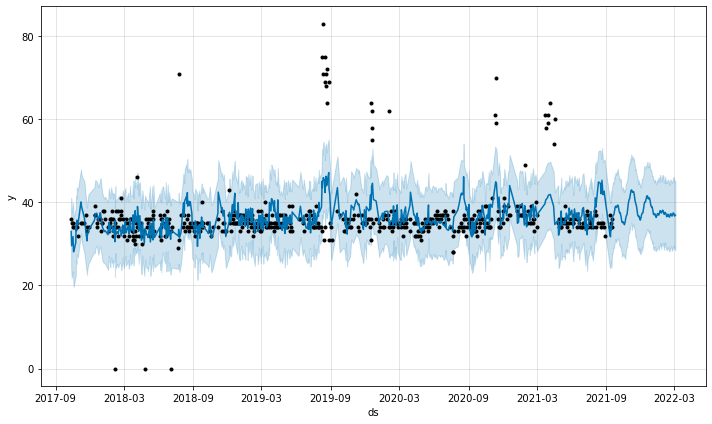

In [28]:
fig1 = model.plot(forecast)

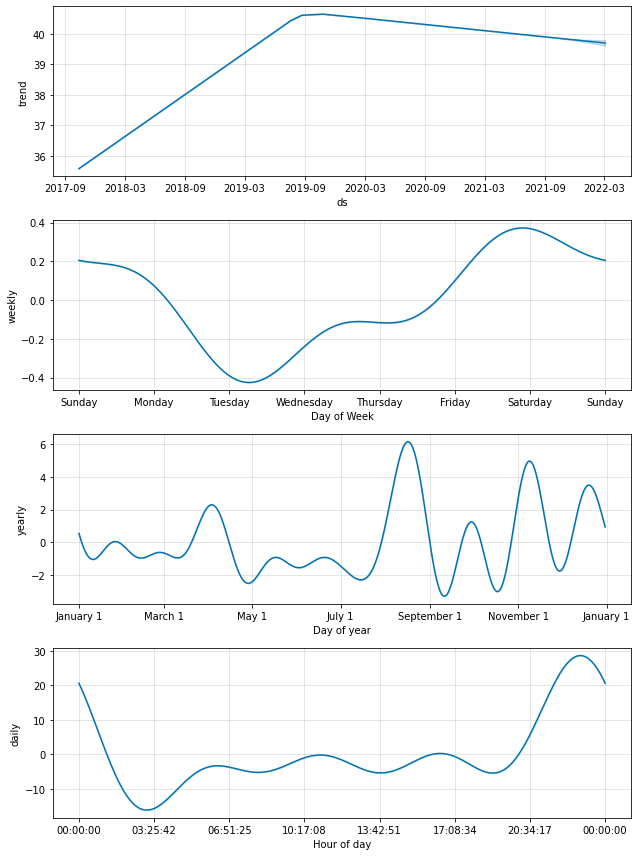

In [31]:
fig2 = model.plot_components(forecast)

In [32]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='365 days', period='180 days', horizon = '365 days')

INFO:prophet:Making 4 forecasts with cutoffs between 2019-03-26 12:06:59 and 2020-09-16 12:06:59


  0%|          | 0/4 [00:00<?, ?it/s]

In [33]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-03-26 12:19:47,35.568147,30.068268,41.898808,34.0,2019-03-26 12:06:59
1,2019-03-27 15:55:51,37.069115,31.315618,42.845334,35.0,2019-03-26 12:06:59
2,2019-03-28 17:03:43,35.511806,28.867739,41.373986,37.0,2019-03-26 12:06:59
3,2019-04-02 17:48:00,36.288685,30.277629,42.135807,35.0,2019-03-26 12:06:59
4,2019-04-03 18:06:57,34.780777,29.036259,40.635253,33.0,2019-03-26 12:06:59


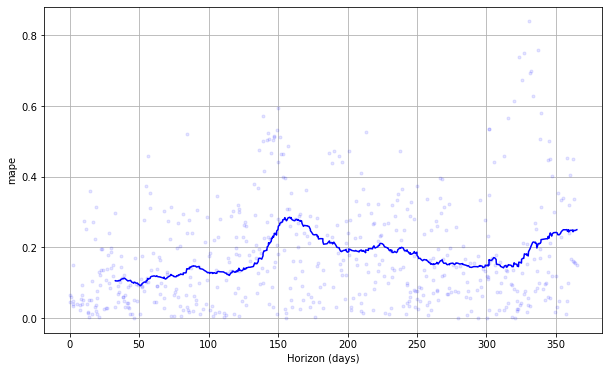

In [34]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [35]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,32 days 22:23:03,22.952423,4.790869,3.680889,0.105378,0.072024,0.101711,0.827586
1,32 days 23:12:00,22.930597,4.788590,3.672685,0.105120,0.072024,0.101480,0.827586
2,34 days 23:53:56,22.892737,4.784636,3.662346,0.104784,0.072024,0.101124,0.827586
3,35 days 01:19:55,22.967433,4.792435,3.677273,0.105346,0.081427,0.101646,0.827586
4,35 days 04:10:14,23.032751,4.799245,3.693859,0.105826,0.081427,0.102153,0.827586


In [36]:
df_sw['y'].describe()

count    596.000000
mean      36.229866
std        7.114373
min        0.000000
25%       34.000000
50%       35.000000
75%       36.000000
max       83.000000
Name: y, dtype: float64

In [23]:
df_sw[df_sw['y'] > 50]

,ds,y
1115,2021-04-17 13:12:30,60.0
1116,2021-04-14 10:17:04,54.0
1117,2021-04-05 10:56:12,64.0
1118,2021-03-31 10:37:01,59.0
1119,2021-03-29 10:24:21,61.0
1120,2021-03-24 10:39:30,58.0
1121,2021-03-22 10:21:52,61.0
1170,2020-11-13 16:47:53,59.0
1171,2020-11-11 16:30:52,70.0
1172,2020-11-10 16:57:05,61.0


In [25]:
df_sw=df_sw.drop(1709)